In [40]:
import json
import os
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


def read_evaluation_data(base_path="."):
    data = []

    # Walk through all directories
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith("evaluation.json"):
                file_path = Path(root)

                # Extract evaluation type and model from directory name
                dir_name = file_path.name
                if "_evaluation_" not in dir_name:
                    print(f"Skipping {dir_name}")
                    continue

                # get the evaluation type and model
                evaluation_model = dir_name.split("_evaluation_")[1]
                eval_type = dir_name.split("_evaluation_")[0]

                # Read JSON file
                with open(file_path / file, "r") as f:
                    result = json.load(f)

                # Extract run information
                run_name = result["run_name"]
                model_name = run_name.split("_")[0]

                # Get the score based on evaluation type
                if eval_type in [
                    "semantic_similarity",
                    "llm_similarity",
                    "persona",
                    "simple",
                ]:
                    score = result.get("percentage_correct", None)
                else:
                    score = result.get("average_score_percentage", None)

                # Extract date from run_name if available
                date = run_name.split("_")[1] if len(run_name.split("_")) > 1 else None
                run_name_short = model_name + "_" + date
                if date == "dataset":
                    date = None

                data.append(
                    {
                        "run_name": run_name_short,
                        "run_name_long": run_name,
                        "model_name": model_name,
                        "evaluation_type": eval_type,
                        "evaluation_model": evaluation_model,
                        "date": date,
                        "score": score,
                    }
                )

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Clean up and sort
    df = df.sort_values(["evaluation_type", "evaluation_model", "date"])

    return df


# Read the data
df = read_evaluation_data("../results/evaluation")

# Add display names for runs
display_dict = {
    "meta-llama-3-1-8b-instruct-4bit_2025-01-23": "Llama 3.1 8B",
    "qwen-qwen-2-5-14b-instruct-4bit_2025-02-01": "Qwen 2.5 14B (bugged)",
    "qwen-qwen-2-5-14b-instruct-4bit_2025-02-06": "Qwen 2.5 14B (improved)",
    "test_dataset": "Test Dataset",
}
df["display_name"] = df["run_name"].map(display_dict).fillna(df["run_name"])

print(f"Eveluation types: {df.evaluation_type.unique()}")
print(f"Runs (long): {df.run_name_long.unique()}")
print(f"Runs (short): {df.run_name.unique()}")
df

Eveluation types: ['llm_similarity' 'rules' 'semantic_similarity' 'simple']
Runs (long): ['meta-llama-3-1-8b-instruct-4bit_2025-01-23_02-39-36'
 'qwen-qwen-2-5-14b-instruct-4bit_2025-02-01_15-16-27'
 'qwen-qwen-2-5-14b-instruct-4bit_2025-02-06_06-21-52' 'test_dataset']
Runs (short): ['meta-llama-3-1-8b-instruct-4bit_2025-01-23'
 'qwen-qwen-2-5-14b-instruct-4bit_2025-02-01'
 'qwen-qwen-2-5-14b-instruct-4bit_2025-02-06' 'test_dataset']


,run_name,run_name_long,model_name,evaluation_type,evaluation_model,date,score,display_name
21,meta-llama-3-1-8b-instruct-4bit_2025-01-23,meta-llama-3-1-8b-instruct-4bit_2025-01-23_02-...,meta-llama-3-1-8b-instruct-4bit,llm_similarity,gpt-4o,2025-01-23,95.412844,Llama 3.1 8B
20,qwen-qwen-2-5-14b-instruct-4bit_2025-02-01,qwen-qwen-2-5-14b-instruct-4bit_2025-02-01_15-...,qwen-qwen-2-5-14b-instruct-4bit,llm_similarity,gpt-4o,2025-02-01,88.990826,Qwen 2.5 14B (bugged)
22,qwen-qwen-2-5-14b-instruct-4bit_2025-02-06,qwen-qwen-2-5-14b-instruct-4bit_2025-02-06_06-...,qwen-qwen-2-5-14b-instruct-4bit,llm_similarity,gpt-4o,2025-02-06,96.330275,Qwen 2.5 14B (improved)
23,test_dataset,test_dataset,test,llm_similarity,gpt-4o,None,100.000000,Test Dataset
25,meta-llama-3-1-8b-instruct-4bit_2025-01-23,meta-llama-3-1-8b-instruct-4bit_2025-01-23_02-...,meta-llama-3-1-8b-instruct-4bit,llm_similarity,gpt-4o-mini,2025-01-23,88.073394,Llama 3.1 8B
24,qwen-qwen-2-5-14b-instruct-4bit_2025-02-01,qwen-qwen-2-5-14b-instruct-4bit_2025-02-01_15-...,qwen-qwen-2-5-14b-instruct-4bit,llm_similarity,gpt-4o-mini,2025-02-01,79.816514,Qwen 2.5 14B (bugged)
26,qwen-qwen-2-5-14b-instruct-4bit_2025-02-06,qwen-qwen-2-5-14b-instruct-4bit_2025-02-06_06-...,qwen-qwen-2-5-14b-instruct-4bit,llm_similarity,gpt-4o-mini,2025-02-06,88.990826,Qwen 2.5 14B (improved)
27,test_dataset,test_dataset,test,llm_similarity,gpt-4o-mini,None,100.000000,Test Dataset
17,meta-llama-3-1-8b-instruct-4bit_2025-01-23,meta-llama-3-1-8b-instruct-4bit_2025-01-23_02-...,meta-llama-3-1-8b-instruct-4bit,rules,gpt-4o,2025-01-23,62.110092,Llama 3.1 8B
16,qwen-qwen-2-5-14b-instruct-4bit_2025-02-01,qwen-qwen-2-5-14b-instruct-4bit_2025-02-01_15-...,qwen-qwen-2-5-14b-instruct-4bit,rules,gpt-4o,2025-02-01,50.810398,Qwen 2.5 14B (bugged)


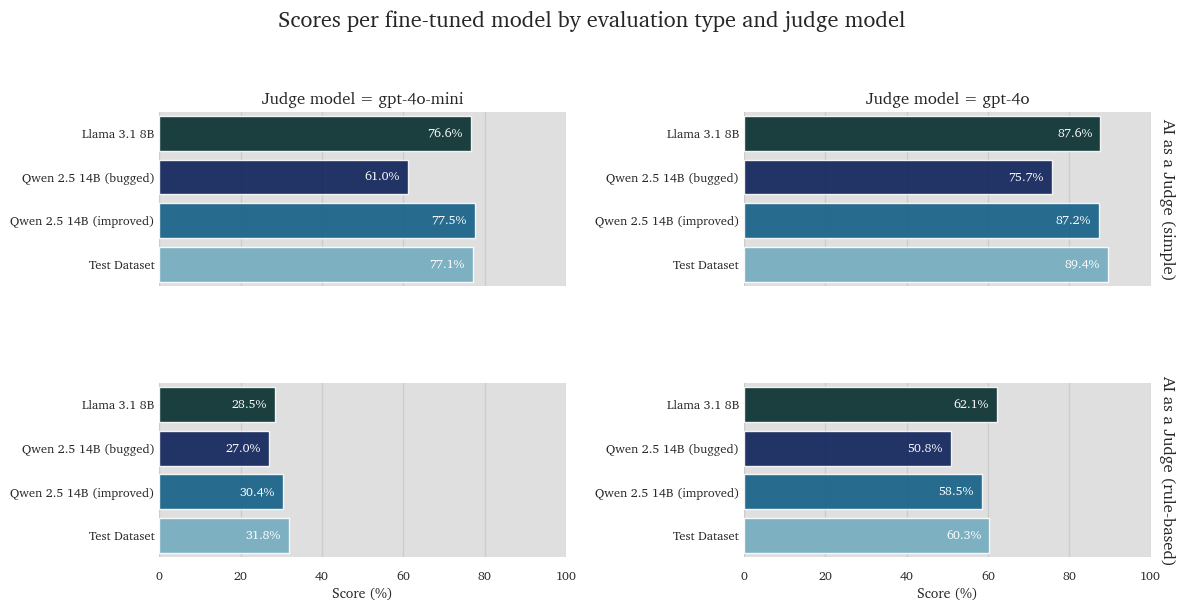

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set clean theme
sns.set_theme(style="whitegrid", font="Charter")

# EVALUATION_TYPES_TO_PLOT = [
#     # "llm_similarity",
#     "simple",
#     "rules",
# ]
EVALUATION_TYPES_DISPLAY_TO_PLOT = [
    "AI as a Judge (simple)",
    "AI as a Judge (rule-based)",
]
EVALUATION_MODELS_TO_PLOT = [
    "gpt-4o-mini",
    "gpt-4o",
]

eval_type_mapping = {
    "simple": "AI as a Judge (simple)",
    "rules": "AI as a Judge (rule-based)",
}

df["eval_type_display"] = (
    df["evaluation_type"].map(eval_type_mapping).fillna(df["evaluation_type"])
)


# Define a blue palette matching the number of unique display names
unique_display_names = df["display_name"].unique()
palette = sns.color_palette("ocean", n_colors=len(unique_display_names))

# Create the FacetGrid without `hue`
g = sns.FacetGrid(
    data=df,
    row="eval_type_display",
    row_order=EVALUATION_TYPES_DISPLAY_TO_PLOT,
    col_order=EVALUATION_MODELS_TO_PLOT,
    col="evaluation_model",
    aspect=2,
    margin_titles=True,
    sharey=False,
    despine=True,
)

# Map the barplot with hue and the defined palette
g.map_dataframe(
    sns.barplot,
    x="score",
    y="display_name",
    hue="display_name",
    orient="h",
    alpha=0.9,
    palette=palette,
    legend=False,
)

# Add plot title
g.fig.suptitle(
    "Scores per fine-tuned model by evaluation type and judge model",
    y=1.02,
    fontsize=16,
    fontweight="bold",
)

# remove 'eval_type_display' from row labels
g.set_titles(row_template="{row_name}", col_template="Judge model = {col_name}")

# remove 'display_name' from y-axis labels
g.set(ylabel="")

# Customize each facet
for ax in g.axes.flat:
    ax.set_xlabel("Score (%)", fontsize=10)
    ax.set_xlim(0, 100)
    ax.set_facecolor("#dfdfdf")
    ax.tick_params(axis="y", length=0, labelsize=9)
    ax.tick_params(axis="x", labelsize=9)
    sns.despine(ax=ax, left=True, bottom=True)

    if ax.get_subplotspec().colspan.start > 0:
        ax.set_ylabel("")

# Add white text labels inside the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(
            p.get_width() - 2,
            p.get_y() + p.get_height() / 2,
            f"{p.get_width():.1f}%",
            ha="right",
            va="center",
            color="white",
            fontsize=9,
        )

plt.tight_layout()
plt.show()

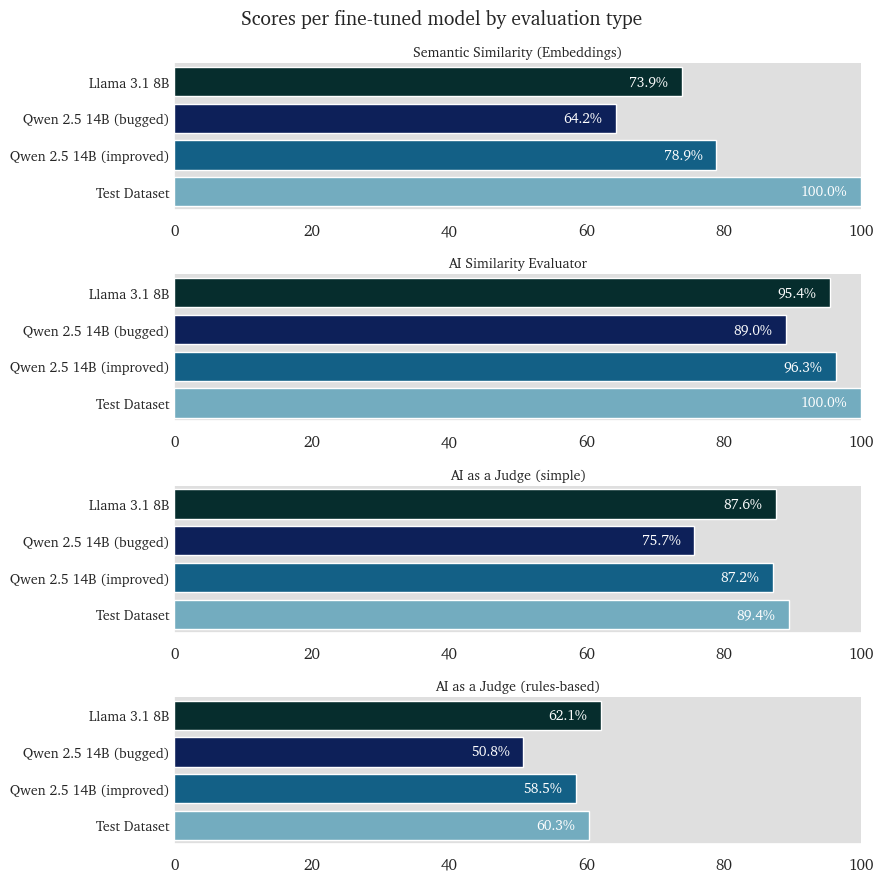

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# import matplotlib.font_manager
# print(sorted({f.name for f in matplotlib.font_manager.fontManager.ttflist}))
sns.set_theme(font="Charter")

eval_type_mapping = {
    "semantic_similarity": "Semantic Similarity (Embeddings)",
    "llm_similarity": "AI Similarity Evaluator",
    "simple": "AI as a Judge (simple)",
    "rules": "AI as a Judge (rules-based)",
}


def plot_all_evaluation_results(df, eval_configs, figsize=(8, 10)):
    """Plot all evaluation results vertically stacked with blue colors and clean styling."""

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1])

    # Set overall title
    fig.suptitle(
        "Scores per fine-tuned model by evaluation type",
        fontsize=14,
        fontweight="bold",
    )

    # Add light grey background to figure
    # fig.patch.set_facecolor("#f5f5f5")

    for i, config in enumerate(eval_configs):
        eval_type = config["eval_type"]
        eval_model = config["eval_model"]

        filtered_df = df[
            (df["evaluation_type"] == eval_type)
            & (df["evaluation_model"] == eval_model)
        ]

        if filtered_df.empty:
            continue

        # plot_df = filtered_df.sort_values("score", ascending=False)
        plot_df = filtered_df
        ax = fig.add_subplot(gs[i])

        # Remove small horizontal y ticks
        plt.tick_params(axis="y", length=0)

        # Set light grey background for the whole sub plot
        ax.set_facecolor("#dfdfdf")

        # Create bar plot with blue colors
        n_bars = len(plot_df)
        blue_palette = sns.color_palette("ocean", n_colors=n_bars)

        sns.barplot(
            data=plot_df,
            x="score",
            y="display_name",
            hue="display_name",
            orient="h",
            palette=blue_palette,
            ax=ax,
            legend=False,
        )

        # Add chart title showing eval_type
        eval_type_display = eval_type_mapping.get(
            eval_type, eval_type.replace("_", " ").title()
        )
        ax.set_title(
            eval_type_display,
            fontsize=10,
            fontweight="bold",
            pad=5,
        )

        # Add value labels
        for p in ax.patches:
            ax.text(
                p.get_width() - 2,
                p.get_y() + p.get_height() / 2,
                f"{p.get_width():.1f}%",
                ha="right",
                va="center",
                color="white",
                fontsize=10,
            )

        # Set x-axis label size
        ax.tick_params(axis="y", labelsize=10)

        # Remove vertical grid lines
        ax.xaxis.grid(False)

        ax.set_xlim(0, 100)
        ax.set_xlabel("")
        ax.set_ylabel("")
        sns.despine(ax=ax)

    plt.tight_layout()
    plt.show()


# Define evaluation configurations
eval_configs = [
    {"eval_type": "semantic_similarity", "eval_model": "text-embedding-3-large"},
    {"eval_type": "llm_similarity", "eval_model": "gpt-4o"},
    {"eval_type": "simple", "eval_model": "gpt-4o"},
    {"eval_type": "rules", "eval_model": "gpt-4o"},
]


plot_all_evaluation_results(df, eval_configs, figsize=(9, 9))